In [1]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pickle
import seaborn as sns

# ignore DtypeWarning warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def filter_dataframe(df, kinase_name):
    df_new = df[df['KINASE_psp'] == kinase_name]
    filtered_df = df_new[df_new['SUB_MOD_RSD_psp'].values == df_new['Phosphosite_johnson'].values]
    return filtered_df


In [3]:
def filter_dataframe2(df, kinase_name):
    df_new = df[df['KINASE_psp'] == kinase_name]
    # filtered_df = df_new[df_new['SUB_MOD_RSD_psp'].values == df_new['Phosphosite_johnson'].values]
    return df_new

In [4]:
def clean_dataframe(df, data):
    df_clean = pd.DataFrame()
    for kinase in df['KINASE_psp'].unique():
        filtered_df = filter_dataframe2(df, kinase)
        df_clean = pd.concat([df_clean, filtered_df])

    # assert sum(df_clean['SUB_MOD_RSD_psp'].values == df_clean['Phosphosite_johnson'].values) == len(df_clean) # check if all phosphosites are the same

    # check if 'SITE_+/-7_AA_psp and 'SITE_+/-7_AA_johnson' are the same , otherwise print that they all are not the same
    # make SITE_+/-7_AA_johnson column all caps 
    df_clean['SITE_+/-7_AA_psp'] = df_clean['SITE_+/-7_AA_psp'].str.upper()
    if not sum(df_clean['SITE_+/-7_AA_psp'].values == df_clean['SITE_+/-7_AA_johnson'].values) == len(df_clean): 
        print(f" For {data} dataset , out of {len(df_clean)} rows, {sum(df_clean['SITE_+/-7_AA_psp'].values == df_clean['SITE_+/-7_AA_johnson'].values)} are the same")
    else:
        print(f"For {data} dataset, all SITE_+/-7_AA_psp and SITE_+/-7_AA_johnson are the same")
    
    return df_clean


In [5]:
data_list = ['ranked_1.csv', 'ranked_2.csv', 'ranked_3.csv']

In [6]:
for data in data_list:
    df = pd.read_csv('../data/merged_kinase_' + data)
    df_clean = clean_dataframe(df, data)
    df_clean.to_csv('../data/cleaned_' + data, index=False)

 For ranked_1.csv dataset , out of 14284 rows, 394 are the same
 For ranked_2.csv dataset , out of 14143 rows, 330 are the same
 For ranked_3.csv dataset , out of 13995 rows, 275 are the same


In [7]:
rank='2'

In [8]:
df = pd.read_csv(f'../data/cleaned_ranked_{rank}.csv')
df

,Unnamed: 0,KINASE_psp,SUBSTRATE_psp,KIN_ORGANISM_psp,SUB_ORGANISM_psp,SITE_+/-7_AA_psp,SUB_MOD_RSD_psp,KIN_ACC_ID_psp,SUB_GENE_ID_psp,SUB_ACC_ID_psp,SITE_GRP_ID_psp,Uniprot Primary Accession_johnson,Protein_johnson,Phosphosite_johnson,SITE_+/-7_AA_johnson,ranked_2_johnson
0,0,HRI,eIF2-alpha,human,human,MILLSELSRRRIRSI,S52,Q9BQI3,1965.0,P05198,4.476350e+05,NaN,NaN,NaN,NaN,NaN
1,1,HRI,eIF2-alpha,human,human,IEGMILLSELSRRRI,S49,Q9BQI3,1965.0,P05198,4.502100e+05,NaN,NaN,NaN,NaN,NaN
2,2,PKCD,HDAC5,human,human,FPLRKTASEPNLKVR,S259,Q05655,10014.0,Q9UQL6,4.479950e+05,NaN,NaN,NaN,NaN,NaN
3,3,PKCD,PTPRA iso2,human,human,PLLARSPSTNRKYPP,S204,Q05655,5786.0,P18433-2,4.476120e+05,NaN,NaN,NaN,NaN,NaN
4,4,PKCD,PTPRA iso2,human,human,QAGSHSNSFRLSNGR,S180,Q05655,5786.0,P18433-2,1.869334e+09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14138,14138,ULK2,Raptor,human,human,DTSSLTQSAPASPTN,S859,Q8IYT8,57521.0,Q8N122,2.024885e+06,NaN,NaN,NaN,NaN,NaN
14139,14139,ULK2,DENND3,human,human,ELAPRNSSLRLTDTA,S490,Q8IYT8,22898.0,A2RUS2,2.305019e+07,NaN,NaN,NaN,NaN,NaN
14140,14140,ULK2,DENND3,human,human,THRRMVVSMPNLQDI,S472,Q8IYT8,22898.0,A2RUS2,7.997148e+06,NaN,NaN,NaN,NaN,NaN
14141,14141,ULK2,SEC16A,human,human,LAQPINFSVSLSNSH,S846,Q8IYT8,9919.0,O15027,5.557872e+07,NaN,NaN,NaN,NaN,NaN


In [9]:
df['length_of_sequence'] = df['SITE_+/-7_AA_psp'].apply(lambda x: len(x))
df

,Unnamed: 0,KINASE_psp,SUBSTRATE_psp,KIN_ORGANISM_psp,SUB_ORGANISM_psp,SITE_+/-7_AA_psp,SUB_MOD_RSD_psp,KIN_ACC_ID_psp,SUB_GENE_ID_psp,SUB_ACC_ID_psp,SITE_GRP_ID_psp,Uniprot Primary Accession_johnson,Protein_johnson,Phosphosite_johnson,SITE_+/-7_AA_johnson,ranked_2_johnson,length_of_sequence
0,0,HRI,eIF2-alpha,human,human,MILLSELSRRRIRSI,S52,Q9BQI3,1965.0,P05198,4.476350e+05,NaN,NaN,NaN,NaN,NaN,15
1,1,HRI,eIF2-alpha,human,human,IEGMILLSELSRRRI,S49,Q9BQI3,1965.0,P05198,4.502100e+05,NaN,NaN,NaN,NaN,NaN,15
2,2,PKCD,HDAC5,human,human,FPLRKTASEPNLKVR,S259,Q05655,10014.0,Q9UQL6,4.479950e+05,NaN,NaN,NaN,NaN,NaN,15
3,3,PKCD,PTPRA iso2,human,human,PLLARSPSTNRKYPP,S204,Q05655,5786.0,P18433-2,4.476120e+05,NaN,NaN,NaN,NaN,NaN,15
4,4,PKCD,PTPRA iso2,human,human,QAGSHSNSFRLSNGR,S180,Q05655,5786.0,P18433-2,1.869334e+09,NaN,NaN,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14138,14138,ULK2,Raptor,human,human,DTSSLTQSAPASPTN,S859,Q8IYT8,57521.0,Q8N122,2.024885e+06,NaN,NaN,NaN,NaN,NaN,15
14139,14139,ULK2,DENND3,human,human,ELAPRNSSLRLTDTA,S490,Q8IYT8,22898.0,A2RUS2,2.305019e+07,NaN,NaN,NaN,NaN,NaN,15
14140,14140,ULK2,DENND3,human,human,THRRMVVSMPNLQDI,S472,Q8IYT8,22898.0,A2RUS2,7.997148e+06,NaN,NaN,NaN,NaN,NaN,15
14141,14141,ULK2,SEC16A,human,human,LAQPINFSVSLSNSH,S846,Q8IYT8,9919.0,O15027,5.557872e+07,NaN,NaN,NaN,NaN,NaN,15


In [10]:
df = df[~df['SITE_+/-7_AA_psp'].apply(lambda x: '_' in x)]

In [11]:
df['length_of_sequence'].value_counts()

15    13644
Name: length_of_sequence, dtype: int64

In [12]:
df['KINASE_psp'].nunique()

407

In [13]:
df.groupby('KINASE_psp')['SITE_+/-7_AA_psp'].apply(list)

KINASE_psp
AAK1                          [SQITSQVTGQIGWRR, LRVVDEKTKDLIVDQ]
ADCK5                                          [YQPRRRKSVKNGQAE]
ALK            [TAPGAGHYEDTILKS, FGMARDIYRASYYRK, GHTSNNIYEAV...
ALK1           [STNHSIGSTQSTPCS, ASSESSSTNHSIGST, HSIGSTQSTPC...
ALK4                          [PKTYVDLTNEETTDS, VDLTNEETTDSTTSK]
                                     ...                        
p70S6K         [ETRTRTSSSCSSYSY, SGDYMPMSPKSVSAP, TRRSRTESITA...
p70S6K iso2                   [SGRPRTTSFAESCKP, NQGGGLSSSGAGEGQ]
p90RSK         [GDAPVSPSSQKLKRK, EFRSRCSSVTGVQRR, AKRSLTSSLEN...
skMLCK                                         [NEPHESRTNSDIVET]
smMLCK         [KRAGGANSNVFSMFE, KKRPQRATSNVFAMF, KRPQRATSNVF...
Name: SITE_+/-7_AA_psp, Length: 407, dtype: object

In [14]:
df.groupby('KINASE_psp')['SITE_+/-7_AA_psp'].apply(list).to_csv('psp_freq_matrix.csv')

In [15]:
df.groupby(f'ranked_{rank}_johnson')['SITE_+/-7_AA_johnson'].apply(list)

ranked_2_johnson
ALK4                     [VDLTNEETTDSTTSK, VDLTNEETTDSTTSK]
AMPKA1    [DELKKVCSTNDLKEL, LKRRNVSSFPDDATS, RQLAKCVSSPH...
AMPKA2    [GSVKRVTSGPSLGSL, FPLRKTASEPNLKVR, FPLRKTASEPN...
ATM       [SLLNLLSSQEEDFNS, SLLNLLSSQEEDFNS, SLLNLLSSQEE...
ATR       [FRPEYSASQLKGFSL, EELDTLASQALSQCP, TLASQALSQCP...
                                ...                        
TBK1      [ISNKDQHSISYTLSR, ISNKDQHSISYTLSR, ISNKDQHSISY...
TTK       [LLAKLEETKEYQEPE, ANQMQPDTTSVVKDS, LLAKLEETKEY...
ULK1      [GMGPVEESWFAPSLE, GMGPVEESWFAPSLE, GMGPVEESWFA...
ULK2                                      [NNSTMQVSFVCQRCS]
VRK1                                      [NKLLGKVTIAQGGVL]
Name: SITE_+/-7_AA_johnson, Length: 103, dtype: object

In [16]:
df.groupby(f'ranked_{rank}_johnson')['SITE_+/-7_AA_johnson'].apply(list).to_csv('johnson_freq_matrix.csv')

In [17]:
def create_pssm(df, kinase_col, sequence_col):

    # Group by 'KINASE_psp' and combine all sequences into a list
    kinase_sequences = df.groupby(kinase_col)[sequence_col].apply(list)

    # Initialize an empty dictionary to store the Logos for each kinase
    data_store = {}

    # For each kinase, create a position frequency matrix and then a sequence logo
    for kinase, sequences in kinase_sequences.items():
        # Combine sequences into a single string for each position
        aligned_sequences = [''.join(seq) for seq in zip(*sequences)]
        
        # Create a DataFrame where each row corresponds to one position
        position_df = pd.DataFrame([Counter(pos) for pos in aligned_sequences]).fillna(0)
        
        # Normalize the counts to get frequencies
        position_freq_matrix = position_df.div(position_df.sum(axis=0), axis=1)
        
        data_store[kinase] = position_freq_matrix
    print(data_store)
    return data_store


   

In [18]:
PSSM_PSP =create_pssm(df, 'KINASE_psp', 'SITE_+/-7_AA_psp')

{'AAK1':       S    L     Q         R         I     V         T         D    E    K  \
0   0.5  0.5  0.00  0.000000  0.000000  0.00  0.000000  0.000000  0.0  0.0   
1   0.0  0.0  0.25  0.333333  0.000000  0.00  0.000000  0.000000  0.0  0.0   
2   0.0  0.0  0.00  0.000000  0.333333  0.25  0.000000  0.000000  0.0  0.0   
3   0.0  0.0  0.00  0.000000  0.000000  0.25  0.333333  0.000000  0.0  0.0   
4   0.5  0.0  0.00  0.000000  0.000000  0.00  0.000000  0.333333  0.0  0.0   
5   0.0  0.0  0.25  0.000000  0.000000  0.00  0.000000  0.000000  1.0  0.0   
6   0.0  0.0  0.00  0.000000  0.000000  0.25  0.000000  0.000000  0.0  0.5   
7   0.0  0.0  0.00  0.000000  0.000000  0.00  0.666667  0.000000  0.0  0.0   
8   0.0  0.0  0.00  0.000000  0.000000  0.00  0.000000  0.000000  0.0  0.5   
9   0.0  0.0  0.25  0.000000  0.000000  0.00  0.000000  0.333333  0.0  0.0   
10  0.0  0.5  0.00  0.000000  0.333333  0.00  0.000000  0.000000  0.0  0.0   
11  0.0  0.0  0.00  0.000000  0.333333  0.00  0.000000 

In [19]:
PSSM_johnson = create_pssm(df, f'ranked_{rank}_johnson', 'SITE_+/-7_AA_johnson')

{'ALK4':       V    D    L    T    N    E    S    K
0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0
6   0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0
7   0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.0
8   0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.0
9   0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0
10  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0
11  0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.0
12  0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.0
13  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0, 'AMPKA1':        D       L         R    V         N    P         E         K         Q  \
0   0.25  0.0625  0.285714  0.1  0.333333  0.1  0.000000  0.000000  0.000000   
1   0.00  0.0000  0.000000  0.0  0.000000  0.2  0.333333  0.076923  0.333333   
2   0.00  0.1875  0.071429  0.0  0.000000  0.0  0.00

In [20]:
PSSM_PSP.keys()

dict_keys(['AAK1', 'ADCK5', 'ALK', 'ALK1', 'ALK4', 'AMPKA1', 'AMPKA2', 'AMPKB1', 'AMPKG2', 'ARAF', 'ASK1', 'ATM', 'ATR', 'AXL', 'Abl', 'Ack', 'Akt1', 'Akt2', 'Akt3', 'AlphaK3', 'Arg', 'AurA', 'AurB', 'AurC', 'BCR-ABL1', 'BIKE', 'BLK', 'BRAF', 'BRD4', 'BRSK1', 'BRSK1 iso2', 'BRSK2', 'BUB1', 'BVR', 'Bcr', 'Brk', 'Btk', 'CAMK1A', 'CAMK1B', 'CAMK1G', 'CAMK2A', 'CAMK2B', 'CAMK2D', 'CAMK2D iso8', 'CAMK2G', 'CAMK4', 'CAMKK1', 'CAMKK2', 'CASK', 'CDC7', 'CDK1', 'CDK10', 'CDK11A', 'CDK11A iso10', 'CDK11B', 'CDK12', 'CDK13', 'CDK14', 'CDK15', 'CDK16', 'CDK18', 'CDK19', 'CDK2', 'CDK20', 'CDK3', 'CDK4', 'CDK5', 'CDK6', 'CDK7', 'CDK8', 'CDK9', 'CDKL2', 'CDKL5', 'CK1A', 'CK1A2', 'CK1D', 'CK1E', 'CK1G1', 'CK1G2', 'CK1G3', 'CK2A1', 'CK2A2', 'CK2B', 'CLK1', 'CLK2', 'CLK3', 'CLK4', 'COL4A3BP', 'CRIK', 'CSFR', 'CSK', 'CTK', 'ChaK1', 'ChaK2', 'Chk1', 'Chk2', 'Cot', 'DAPK1', 'DAPK2', 'DAPK3', 'DDR1', 'DLK', 'DMPK1', 'DNAPK', 'DRAK1', 'DYRK1A', 'DYRK1B', 'DYRK2', 'DYRK3', 'DYRK4', 'EEF2K', 'EGFR', 'ENPP3', '

In [21]:
PSSM_johnson.keys()

dict_keys(['ALK4', 'AMPKA1', 'AMPKA2', 'ATM', 'ATR', 'BIKE', 'BRAF', 'BUB1', 'CAMK1A', 'CAMK2A', 'CAMK2D', 'CAMK2G', 'CAMKK1', 'CAMKK2', 'CDC7', 'CDK1', 'CDK13', 'CDK14', 'CDK2', 'CDK3', 'CDK4', 'CDK5', 'CDK6', 'CDK7', 'CDK8', 'CDK9', 'CDKL5', 'CK1A', 'CK1D', 'CK1E', 'CK1G1', 'CK1G2', 'CK2A1', 'CK2A2', 'DAPK3', 'DNAPK', 'EEF2K', 'ERK1', 'ERK2', 'ERK5', 'FAM20C', 'GSK3A', 'GSK3B', 'HIPK2', 'HPK1', 'IKKA', 'IKKB', 'IKKE', 'IRAK4', 'JNK1', 'JNK2', 'KIS', 'LATS1', 'LATS2', 'LKB1', 'MAPKAPK2', 'MARK2', 'MEK1', 'MEKK3', 'MEKK6', 'MINK', 'MLK3', 'MSK1', 'MST1', 'NDR1', 'NEK6', 'NEK7', 'NEK9', 'NLK', 'OSR1', 'P38A', 'P38B', 'P38D', 'PAK1', 'PAK2', 'PAK4', 'PDHK1', 'PDHK4', 'PDK1', 'PERK', 'PKCA', 'PKCD', 'PKCE', 'PKCG', 'PKCI', 'PKCZ', 'PLK1', 'PLK3', 'PLK4', 'PRKD1', 'PRKD2', 'RAF1', 'RIPK3', 'ROCK1', 'SGK1', 'SRPK1', 'STLK3', 'TAK1', 'TBK1', 'TTK', 'ULK1', 'ULK2', 'VRK1'])

In [22]:
common_family = set(PSSM_PSP.keys()).intersection(set(PSSM_johnson.keys()))


NEK7 PSP and Johson data have different lengths
Psp is 17 and Johnson is 10
psp columns: Index(['N', 'K', 'P', 'G', 'A', 'L', 'D', 'I', 'H', 'S', 'T', 'E', 'R', 'V',
       'M', 'C', 'Q'],
      dtype='object') and johnson columns: Index(['P', 'I', 'K', 'N', 'L', 'H', 'S', 'G', 'M', 'D'], dtype='object')
----------------------------------------
CDK8 PSP and Johson data have different lengths
Psp is 19 and Johnson is 15
psp columns: Index(['T', 'P', 'N', 'S', 'Y', 'D', 'E', 'V', 'F', 'K', 'Q', 'L', 'A', 'H',
       'G', 'I', 'R', 'M', 'W'],
      dtype='object') and johnson columns: Index(['P', 'S', 'F', 'N', 'T', 'L', 'Y', 'D', 'H', 'G', 'E', 'Q', 'M', 'W',
       'A'],
      dtype='object')
----------------------------------------
GSK3A PSP and Johson data have different lengths
Psp is 20 and Johnson is 10
psp columns: Index(['F', 'K', 'G', 'P', 'N', 'V', 'Q', 'M', 'T', 'L', 'C', 'A', 'E', 'S',
       'D', 'H', 'R', 'I', 'Y', 'W'],
      dtype='object') and johnson columns: Index(['A'

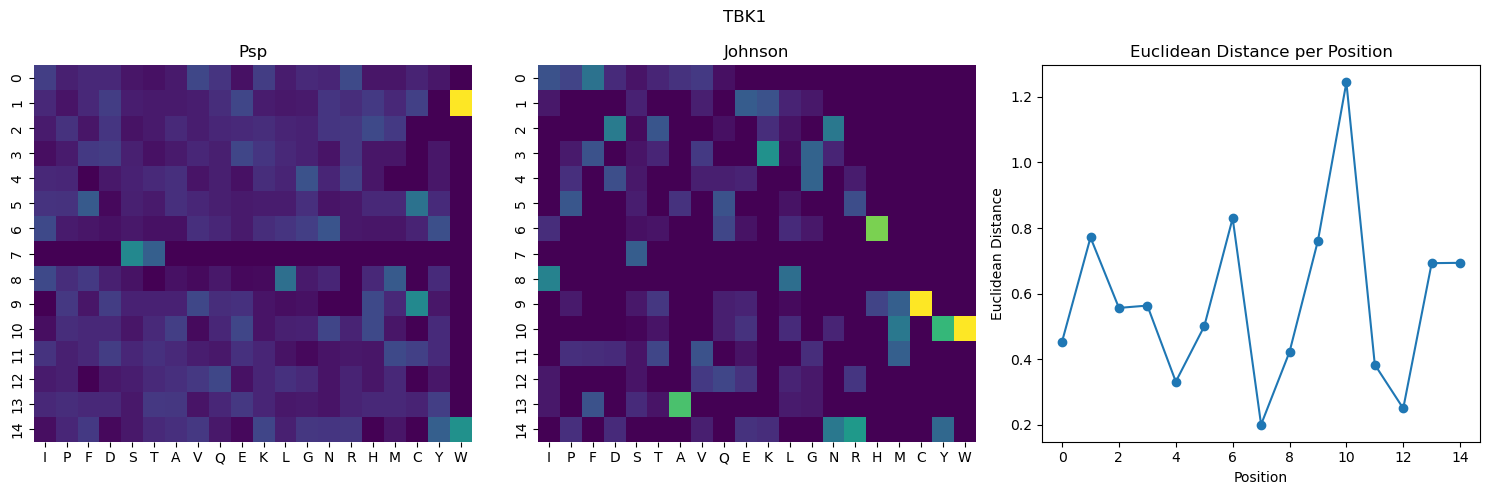

PLK4 PSP and Johson data have different lengths
Psp is 20 and Johnson is 18
psp columns: Index(['A', 'S', 'P', 'I', 'C', 'M', 'G', 'T', 'N', 'Q', 'L', 'R', 'E', 'V',
       'K', 'F', 'W', 'D', 'H', 'Y'],
      dtype='object') and johnson columns: Index(['I', 'A', 'H', 'S', 'V', 'E', 'Q', 'R', 'F', 'L', 'T', 'K', 'N', 'P',
       'D', 'W', 'G', 'M'],
      dtype='object')
----------------------------------------
NEK9 PSP and Johson data have different lengths
Psp is 18 and Johnson is 12
psp columns: Index(['G', 'S', 'E', 'Q', 'K', 'L', 'Y', 'A', 'P', 'T', 'V', 'M', 'D', 'H',
       'R', 'I', 'N', 'F'],
      dtype='object') and johnson columns: Index(['E', 'K', 'A', 'G', 'L', 'P', 'R', 'S', 'I', 'N', 'T', 'D'], dtype='object')
----------------------------------------
P38A PSP and Johson data have different lengths
Psp is 20 and Johnson is 15
psp columns: Index(['L', 'I', 'K', 'V', 'A', 'S', 'T', 'E', 'P', 'Q', 'D', 'M', 'R', 'F',
       'G', 'N', 'H', 'Y', 'C', 'W'],
      dtype='object

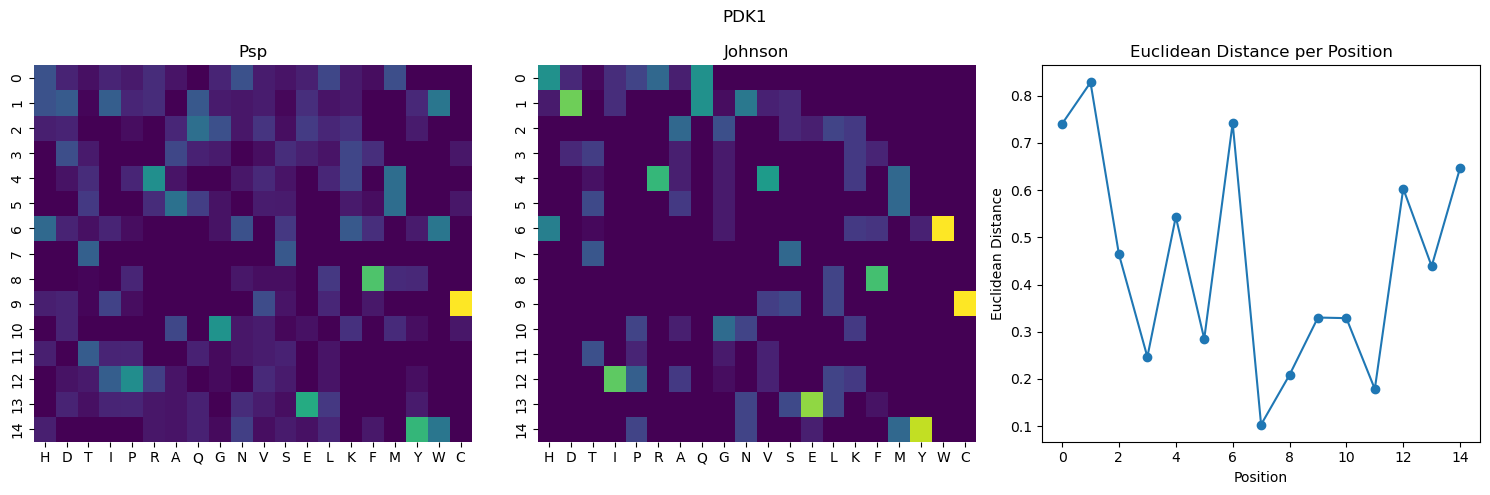

AMPKA1 PSP and Johson data have different lengths
Psp is 20 and Johnson is 18
psp columns: Index(['S', 'M', 'N', 'A', 'H', 'I', 'K', 'G', 'R', 'Q', 'Y', 'D', 'E', 'L',
       'V', 'F', 'T', 'C', 'W', 'P'],
      dtype='object') and johnson columns: Index(['D', 'L', 'R', 'V', 'N', 'P', 'E', 'K', 'Q', 'A', 'I', 'T', 'M', 'H',
       'C', 'S', 'F', 'G'],
      dtype='object')
----------------------------------------
MSK1 PSP and Johson data have different lengths
Psp is 20 and Johnson is 10
psp columns: Index(['E', 'G', 'D', 'K', 'R', 'T', 'P', 'Y', 'A', 'I', 'S', 'M', 'V', 'H',
       'F', 'L', 'Q', 'W', 'C', 'N'],
      dtype='object') and johnson columns: Index(['E', 'Y', 'R', 'H', 'T', 'M', 'D', 'K', 'S', 'G'], dtype='object')
----------------------------------------
CK2A1 PSP and Johson data have different lengths
Psp is 20 and Johnson is 21
psp columns: Index(['H', 'D', 'P', 'E', 'F', 'R', 'T', 'S', 'A', 'G', 'Y', 'N', 'L', 'I',
       'Q', 'M', 'V', 'K', 'C', 'W'],
      dtype='obj

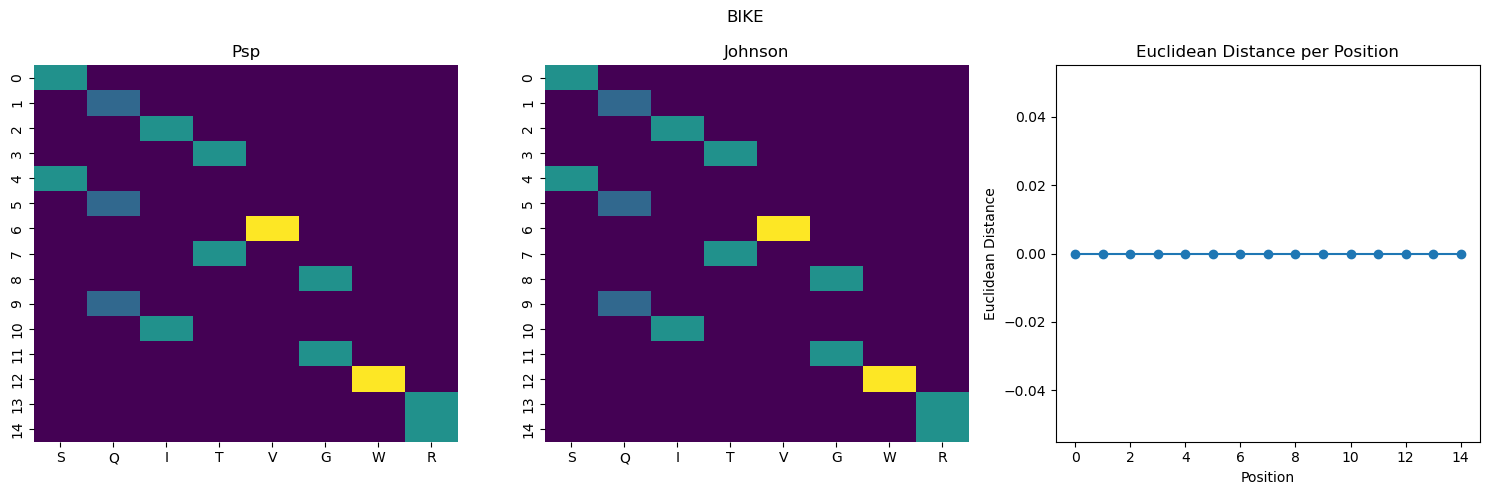

JNK2 PSP and Johson data have different lengths
Psp is 20 and Johnson is 16
psp columns: Index(['V', 'A', 'G', 'S', 'K', 'T', 'I', 'P', 'F', 'Q', 'L', 'R', 'E', 'N',
       'Y', 'D', 'M', 'H', 'W', 'C'],
      dtype='object') and johnson columns: Index(['Q', 'A', 'T', 'P', 'D', 'E', 'I', 'L', 'K', 'N', 'G', 'S', 'V', 'H',
       'F', 'W'],
      dtype='object')
----------------------------------------
ERK2 PSP and Johson data have different lengths
Psp is 20 and Johnson is 21
psp columns: Index(['E', 'S', 'Y', 'K', 'G', 'P', 'D', 'T', 'L', 'A', 'V', 'I', 'M', 'F',
       'Q', 'R', 'W', 'N', 'H', 'C'],
      dtype='object') and johnson columns: Index(['S', 'T', 'R', 'E', 'K', 'L', 'D', 'F', 'N', 'P', 'A', 'H', 'C', 'Q',
       'I', 'G', 'M', 'Y', 'V', 'W', '_'],
      dtype='object')
----------------------------------------
NDR1 PSP and Johson data have different lengths
Psp is 20 and Johnson is 10
psp columns: Index(['I', 'A', 'P', 'K', 'E', 'D', 'N', 'L', 'Q', 'V', 'S', 'W', 'R', 'G',

In [23]:
for family in common_family:
    pssm1 = PSSM_PSP[family]
    pssm2 = PSSM_johnson[family]

    if pssm1.shape[1] != pssm2.shape[1]:
        print(family, 'PSP and Johson data have different lengths')
        print(f"Psp is {pssm1.shape[1]} and Johnson is {pssm2.shape[1]}")
        print(f"psp columns: {pssm1.columns} and johnson columns: {pssm2.columns}")
        print("----------------------------------------")
        continue

    # make the columns match
    try:
        print("***********")
        print(f"{family} is being processed")
        pssm1 = pssm1[pssm2.columns]
    
        # Calculate Euclidean distances for each position
        distances = np.linalg.norm(pssm1 - pssm2, axis=1)

        # Plotting the PSSMs and distances
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        # set figure title 
        fig.suptitle(family)

        sns.heatmap(pssm1, ax=axes[0], cmap='viridis', cbar=False)
        axes[0].set_title('Psp')

        sns.heatmap(pssm2, ax=axes[1], cmap='viridis', cbar=False)
        axes[1].set_title('Johnson')

        axes[2].plot(distances, marker='o')
        axes[2].set_title('Euclidean Distance per Position')
        axes[2].set_xlabel('Position')
        axes[2].set_ylabel('Euclidean Distance')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(family, e)
    